In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.8395061728395061, Loss: 0.525347356443052
Checkpoint 200, Accuracy: 0.8395061728395061, Loss: 0.525347356443052
Checkpoint 300, Accuracy: 0.8395061728395061, Loss: 0.525347356443052
Checkpoint 400, Accuracy: 0.8395061728395061, Loss: 0.525347356443052
Checkpoint 500, Accuracy: 0.8395061728395061, Loss: 0.525347356443052


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9379298  0.05538939 0.00668074]
[1. 0. 0.] <-> [0.7982138  0.09098651 0.11079974]
[1. 0. 0.] <-> [0.9082507  0.07583739 0.01591199]
[1. 0. 0.] <-> [0.93110687 0.05889582 0.00999738]
[0. 1. 0.] <-> [0.9691506  0.02519857 0.00565084]
[0. 0. 1.] <-> [0.58114   0.0051192 0.4137408]
[1. 0. 0.] <-> [0.89436555 0.02061856 0.0850158 ]
[1. 0. 0.] <-> [0.907796   0.0554035  0.03680054]
[1. 0. 0.] <-> [0.88602346 0.04239452 0.07158196]
[1. 0. 0.] <-> [0.6945141  0.28687254 0.01861329]
[0. 1. 0.] <-> [0.97398597 0.01702182 0.00899228]
[1. 0. 0.] <-> [0.8321385  0.01989623 0.14796522]
[1. 0. 0.] <-> [0.802448   0.01214554 0.18540646]
[1. 0. 0.] <-> [0.8740734  0.02231853 0.10360815]
[1. 0. 0.] <-> [0.8657668  0.02939014 0.10484295]
[1. 0. 0.] <-> [0.9502807  0.03672241 0.01299687]
[1. 0. 0.] <-> [0.867237   0.01158821 0.12117485]
[0. 1. 0.] <-> [0.659792   0.3363808  0.00382716]
[1. 0. 0.] <-> [0.86040455 0.02857357 0.11102191]
[0. 0. 1.] <-> [0.6078521  0.00570272 0.38644522]
[1.

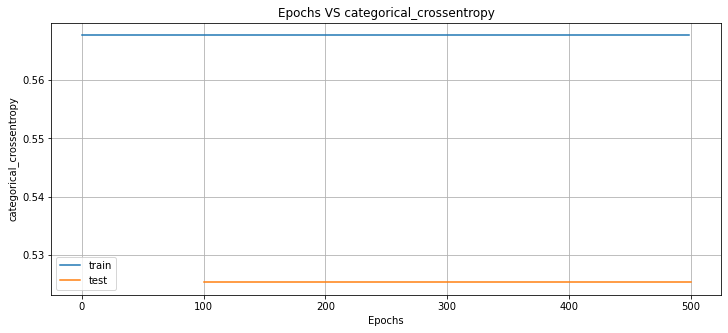

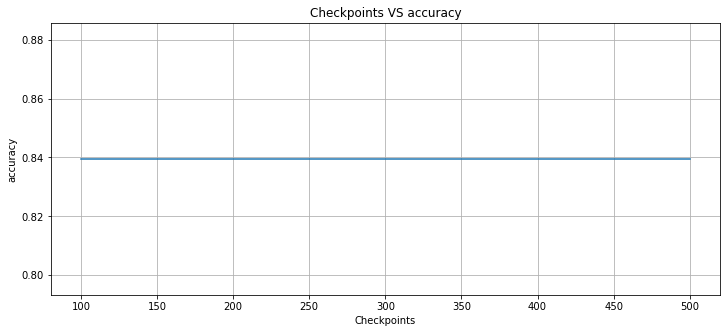

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8395061728395061, 'mean_square_error': 0.31028959912436727, 'categorical_crossentropy': 0.525347356443052, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 26, 'tn_hit': 4, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 12}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 100} 


{'accuracy': 0.8395061728395061, 'mean_square_error': 0.31028959912436727, 'categorical_crossentropy': 0.525347356443052, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 26, 'tn_hit': 4, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 12}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 200} 


{'accuracy': 0.8395061728395061, 'mean_square_error': 0.31028959912436727, 'categorical_crossentropy': 0.525347356443052, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 26, 'tn_hit': 4, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 12}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hi

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[-1.30900189 -0.20698802  2.91418787  1.57787336 -1.16456174]
 bias: 0.7688134648329239

Neuron 1: weights:
[-1.28251052  1.01974224  2.09855895 -1.10562082 -1.51673665]
 bias: -0.3394810799254455

Neuron 2: weights:
[ 1.87231531  2.7180294  -2.59580087 -0.20428931  2.17672592]
 bias: 2.47699074412413

Neuron 3: weights:
[ 0.32209198  2.12673598 -2.21161763 -1.12730462 -2.19442779]
 bias: 0.9345436258932502

$
Layer 2
Neuron 0: weights:
[-0.83052639  1.78229492  2.58284301 -2.13055065]
 bias: 1.5200172122260138

Neuron 1: weights:
[ 1.35175797  1.83171285 -0.20828152 -2.0263223 ]
 bias: -0.5253648175708552

Neuron 2: weights:
[-1.76531065 -2.2365681   1.54640846 -2.91688394]
 bias: 2.262286163696568

$

